<a href="https://colab.research.google.com/github/nse4real/employee-joining-classification/blob/main/Employee_joining_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [218]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
# pre-processing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
# over-sampling
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
# classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
# shap importance
%pip install shap
import shap
# progress bar
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# matplotlib defaults
plt.style.use("fivethirtyeight")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/drive/MyDrive/Introduction to Business Reporting.pdf
/content/drive/MyDrive/Structuring business reporting, summary writing and presentation.pdf
/content/drive/MyDrive/List of stories Team-Calculon.gdoc
/content/drive/MyDrive/Meeting notes Team-Calculon.gdoc
/content/drive/MyDrive/Role-of-government-in-advancing-agriculture-in-Africa-Dr-Shadrack-Moephuli.pdf
/content/drive/MyDrive/Commercial-Producer-Financing-Dawie-Maree.pdf
/content/drive/MyDrive/Meeting notes (2).gdoc
/content/drive/MyDrive/Team Iron-Throne .gsheet
/content/drive/MyDrive/TransferRule.gsheet
/content/drive/MyDrive/phone top up Spec Document.gdoc
/content/drive/MyDrive/Untitled document (1).gdoc
/content/drive/MyDrive/Salesforce_Developer_Career_eBook.pdf
/content/drive/MyDrive/Meeting notes (1).gdoc
/content/drive/MyDrive/Meeting notes.gdoc
/content/drive/MyDrive/Directories listed.gsheet
/content/drive/MyDrive

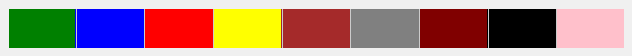

In [220]:
color = ["green", "Blue", "Red", "Yellow", "Brown", "Grey",'Maroon','black','Pink']
sns.set_palette(color)
sns.palplot(sns.color_palette())

#Descriptive data analysis

In [221]:
hr = pd.read_csv("/content/drive/MyDrive/hr_data.csv",index_col='SLNO')
hr.head()

,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
SLNO,,,,,,,,,,,,,,,,,
1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [222]:
hr.shape

(8995, 17)

In [223]:
hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Candidate Ref,8995.0,2.843647e+06,486344.774552,2109586.00,2386476.00,2807482.0,3300059.50,3836076.00
Duration to accept offer,8995.0,2.143446e+01,25.811616,0.00,3.00,10.0,33.00,224.00
Notice period,8995.0,3.929183e+01,22.220239,0.00,30.00,30.0,60.00,120.00
Pecent hike expected in CTC,8995.0,4.386480e+01,29.788975,-68.83,27.27,40.0,53.85,359.77
Percent hike offered in CTC,8995.0,4.065736e+01,36.064060,-60.53,22.09,36.0,50.00,471.43
Percent difference CTC,8995.0,-1.573802e+00,19.610729,-67.27,-8.33,0.0,0.00,300.00
Rex in Yrs,8995.0,4.239022e+00,2.547571,0.00,3.00,4.0,6.00,24.00
Age,8995.0,2.991317e+01,4.097912,20.00,27.00,29.0,34.00,60.00


In [224]:
hr.isnull().sum()

Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [225]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8995 entries, 1 to 12333
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Candidate Ref                8995 non-null   int64  
 1   DOJ Extended                 8995 non-null   object 
 2   Duration to accept offer     8995 non-null   int64  
 3   Notice period                8995 non-null   int64  
 4   Offered band                 8995 non-null   object 
 5   Pecent hike expected in CTC  8995 non-null   float64
 6   Percent hike offered in CTC  8995 non-null   float64
 7   Percent difference CTC       8995 non-null   float64
 8   Joining Bonus                8995 non-null   object 
 9   Candidate relocate actual    8995 non-null   object 
 10  Gender                       8995 non-null   object 
 11  Candidate Source             8995 non-null   object 
 12  Rex in Yrs                   8995 non-null   int64  
 13  LOB              

In [226]:
# divide the num and cat columns

num_col = [col for col in hr.columns if hr[col].dtypes in ['int64','float64']]
cat_col = [col for col in hr.columns if hr[col].dtypes == 'object']

print("Numerical columns are: \n",num_col)
print("**********************************************************")
print('Categorical columns are: \n',cat_col)

Numerical columns are: 
 ['Candidate Ref', 'Duration to accept offer', 'Notice period', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Percent difference CTC', 'Rex in Yrs', 'Age']
**********************************************************
Categorical columns are: 
 ['DOJ Extended', 'Offered band', 'Joining Bonus', 'Candidate relocate actual', 'Gender', 'Candidate Source', 'LOB', 'Location', 'Status']


**Observation**
#Exploratory data analysis
With 8995 samples and 17 columns including a mixture of object, int64, and float64 data types, the data set is cleaned.

There are eight numerical columns and nine object columns

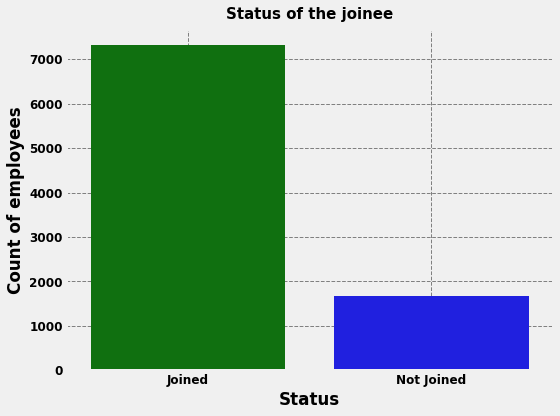

In [227]:
sts = hr['Status'].value_counts().reset_index()

# plot the status of joinee
plt.figure(figsize=(8,6))
sns.barplot(x=sts['index'], y=sts.Status)
plt.grid(visible=True, linestyle='--', color=color[5])
plt.title('Status of the joinee', weight = 'bold', size = 15)
plt.xticks(size = 12, weight = 'bold')
plt.xlabel("Status")
plt.ylabel("Count of employees")
plt.yticks(size = 12, weight = 'bold')
plt.show()

**Observation**

As shown in the plot, classes are imbalanced.

There are several ways to tackle an imbalanced dataset

1. Accuracy is not a good metric for imbalanced problems. Instead, look at any of the following metrics:

• A combination of Precision and Recall

• F-Score

• Confusion Matrix

• ROC Curves

2. Collect more data. If you can find more potential employees, do that. Sometimes this is not possible, but other times it's the simplest solution you can do.

3. Augment the dataset with synthetic data. If you have the means to create realistic samples, you can do that to augment the dataset and balance it. For example, Tesla uses synthetic data to train their models on non-common situations.

4. Resample your dataset.

• Oversample the Not Joined instance.

• Undersample the Joined instance.

You can also combine both. Here is an example: You can resample our hypothetical dataset by doing the following:

• Use every Not joined instance 3.5 times.
• Use every other Joined instance.

New dataset:

• Not Joined: 5950 pictures (1700 × 3.5)

• Cats: 475 pictures (5840 ÷ 1.25)

Important note:

 Both over and undersampling introduce biases into your dataset. You are changing the data distribution by arbitrarily messing with the existing samples. Make sure you keep this in mind and think about the consequences. In this project this is what we did.

**Here in our example: With the help of the SMOTEENN resampler and gridserachCV, we will use logistics regression as a baseline and 7 additional models to tackle this problem.**


5. Weight each class differently.
There are multiple techniques to weight each class differently and have the model pay more or less attention to those samples.
For example, we can have a large weight for "Not Joined" instances to compensate for the lack of samples.

6. Different algorithms handle imbalances differently.
Decision Trees are excellent at handling imbalanced classes. Neural networks, not so much

7. Make sure you approach the problem correctly. Many people have tried to solve anomaly detection problems using multi-class classification. That's the wrong approach.  Understand what problem you are trying to solve before deciding how to do it.

Let's recap how you can handle an imbalanced dataset:

1. Pick the appropriate performance metric
2. Collect more data
3. Generate synthetic data
4. Resample the dataset
5. Use different weights
6. Try different algorithms
7. Approach the problem correctly.

In [228]:
dis_col = []
cont_col = []

#keeping cardinality 10 seperate the discrete and continuos variables

for col in num_col:
    if col == 'Candidate Ref':
        pass
    elif hr[col].nunique() < 10:
        dis_col.append(col)
    else:
        cont_col.append(col)  
    
print(dis_col)
print(cont_col)

['Notice period']
['Duration to accept offer', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Percent difference CTC', 'Rex in Yrs', 'Age']


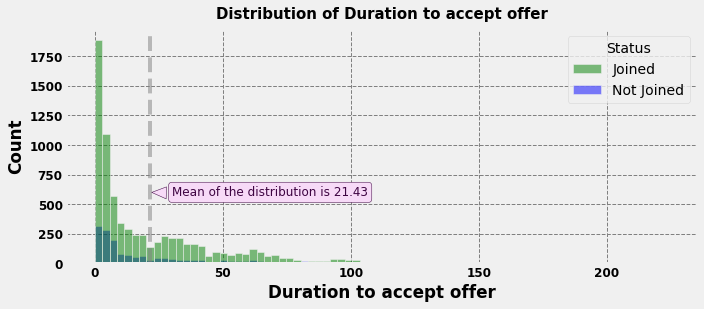

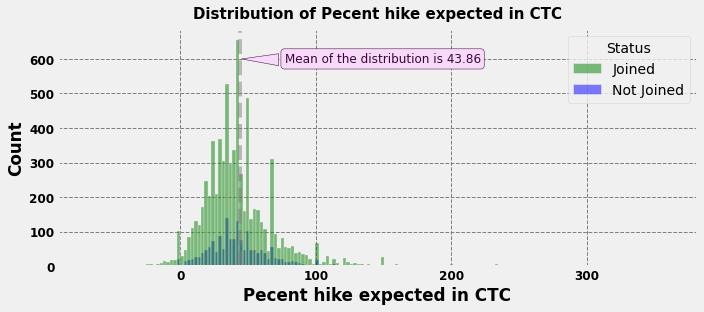

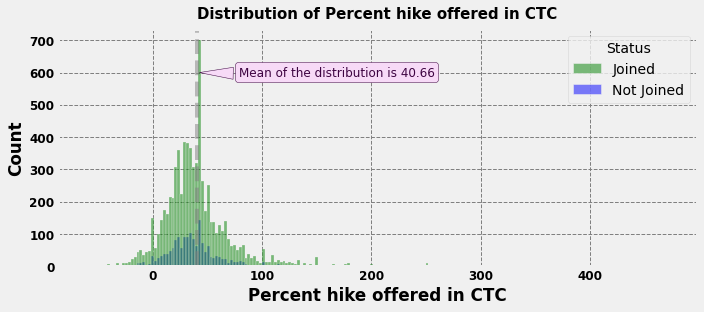

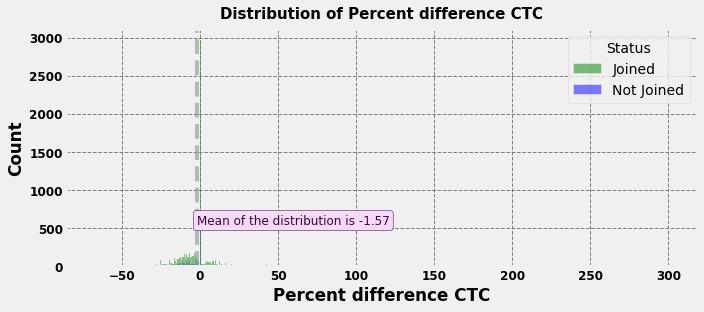

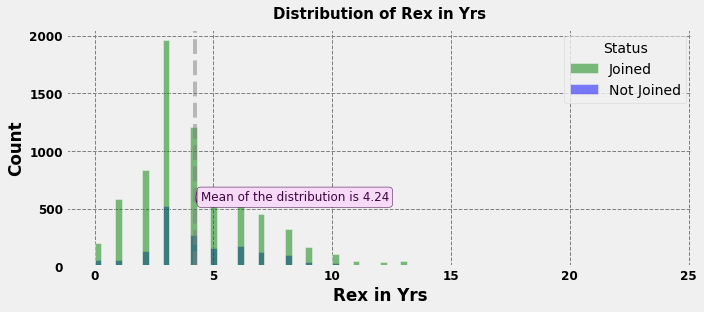

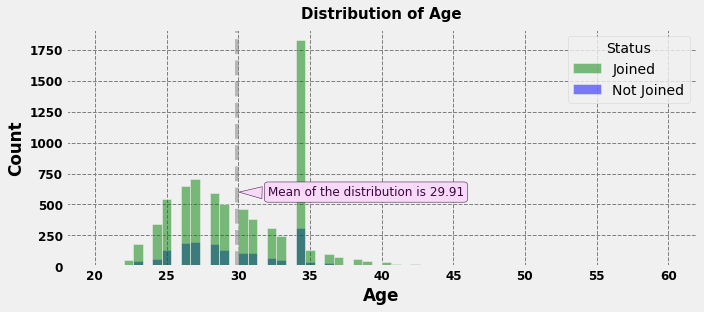

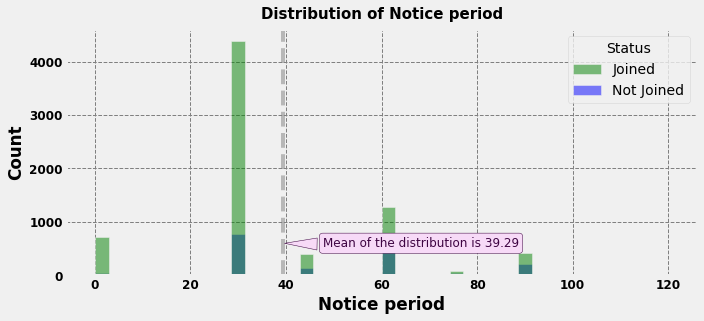

In [229]:
# find out the distribution of continous columns
cont_col.append('Notice period')
for i,col in enumerate(cont_col):
    plt.figure(figsize=(10,28))
    plt.subplot(7,1,i+1)
    sns.histplot(x=hr[col], 
                 hue=hr['Status'], 
                 color=color[2])
    plt.axvline(x=hr[col].mean(), 
                linestyle='--', 
                alpha= 0.5, 
                color=color[5])
    plt.title(f'Distribution of {col}', 
              weight = 'bold', 
              size = 15)
    plt.xticks(size = 12, 
               weight = 'bold')
    plt.yticks(size = 12,
               weight = 'bold')
    plt.grid(visible=True, 
             linestyle='--', 
             color=color[5])
    plt.annotate(f'Mean of the distribution is {round(hr[col].mean(),2)}',
            xy=(hr[col].mean(),600),
            xycoords='data',
            xytext=(hr[col].mean()+1, 0), textcoords='offset points',
            size=12, va="center",
            color='#3e0542',
            bbox=dict(boxstyle="round",facecolor='#f7daf7', edgecolor='#3e0542'),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                            facecolor='#f7daf7', 
                            edgecolor='#3e0542',
                            relpos=(0.1, 0.4)))
    
plt.show() 

**Observations**


As may be observed from the plots above, there are no notable features. No feature specifically explains the target variable.


Average percent hike offered is significantly smaller than the expected by the candidate.

Average age is about 29.9 years with predominant numbers of candidates from 30+ years age group.

It typically takes a candidate 21 days to accept a job offer.

The majority of candidates, on average, have 4.24 years of relevant experience in their respective fields of industry

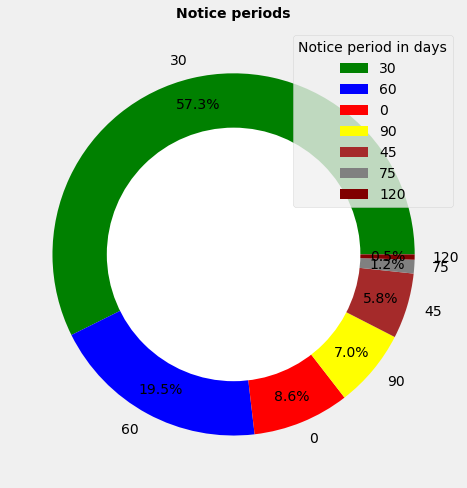

In [230]:
donuthr = pd.DataFrame(hr['Notice period'].value_counts())

# plot donut chart of Notice period
notice = donuthr.index
numbers = donuthr.values.ravel()
colors = color
explode = (0.05,0.05,0.05,0.05,0.05,0.05,0.05)
#plot the pie
fig=plt.figure(figsize=(7,7))
fig=plt.pie(numbers, 
        colors=colors, 
        labels=notice, 
        autopct='%1.1f%%', 
        pctdistance=0.85, 
        )
centre_circle = plt.Circle((0,0), 0.7, fc='White')
fig= plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Notice periods")
plt.legend(title="Notice period in days")
plt.show()

In [231]:
nt_hr= hr.pivot_table(index='Notice period',
              columns='Status',
              values='Candidate Ref',
              aggfunc="count")
nt_hr['ratio_by_joining'] = nt_hr['Joined']/nt_hr['Not Joined']
nt_hr['Joining percent'] = nt_hr['Joined']/(nt_hr['Joined']+nt_hr['Not Joined'])*100
nt_hr

Status,Joined,Not Joined,ratio_by_joining,Joining percent
Notice period,,,,
0,726,51,14.235294,93.436293
30,4393,765,5.742484,85.168670
45,397,129,3.077519,75.475285
60,1285,470,2.734043,73.219373
75,75,35,2.142857,68.181818
90,415,212,1.957547,66.188198
120,22,20,1.100000,52.380952


**Observations**

We can infer that employers often require a 30-day notice period.


As we can see from the table above, there is a notable trend to note: as the notice period lengthens, the percentage of persons joining the company lowers.

As a result, we are able to respond to HR by saying that the Notice time is a factor that probably affects the Candidate's joining status. We learned this from the feature importance of the tree-based model RANDOM FOREST.

The longer the notice period, the less likely a candidate is to join the organisation.

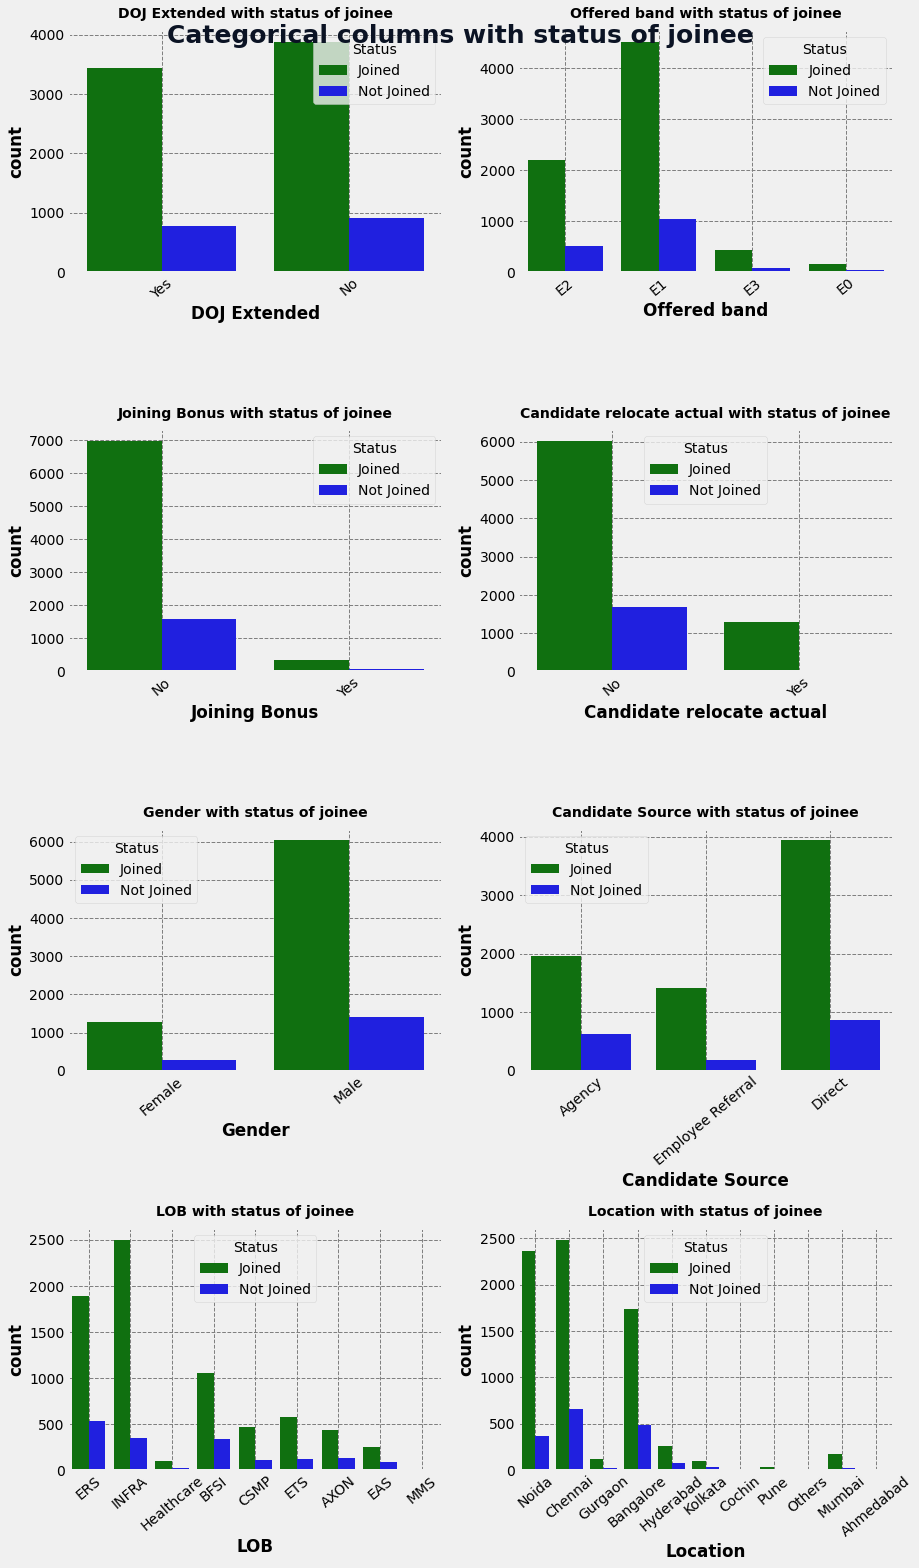

In [232]:
col_list = [col for col in cat_col if col != 'Status']

fig, ax = plt.subplots(4,2, figsize=(13,22))
for idx, col in enumerate(col_list):
    sns.countplot(x=col, hue='Status', data=hr, ax=ax[idx//2, idx%2])
    ax[idx//2, idx%2].grid(visible=True, linestyle='--', color=color[5])
    ax[idx//2, idx%2].set_xticklabels(list(hr[col].unique()), rotation=40)
    ax[idx//2, idx%2].set_title(f'{col} with status of joinee', pad=12)
    
plt.suptitle(f'Categorical columns with status of joinee', fontsize=25, fontweight='bold',
            color='#0b1324')
plt.show()

**Observations**

The majority of our applicants are from the Indian city of Chennai, and vice versa, as are the majority of our hires.


The company sources the majority of candidates directly.

The majority of the applicants are men.

The most popular offer band among employers is E1.

In [233]:
nlobhr= pd.DataFrame(hr.groupby(['Notice period','LOB'])['Candidate Ref'].count())
nlobhr

Candidate Ref
Notice period LOB                      
0             AXON                   53
              BFSI                   39
              CSMP                   26
              EAS                    28
              ERS                   173
              ETS                    63
              Healthcare              8
              INFRA                 387
30            AXON                  291
              BFSI                  814
              CSMP                  357
              EAS                   172
              ERS                  1374
              ETS                   343
              Healthcare             69
              INFRA                1731
              MMS                     7
45            AXON                   34
              BFSI                   61
              CSMP                   43
              EAS                    19
              ERS                   202
              ETS                    46
              Healthcare              5
              INFRA                 115
              MMS                     1
60            AXON                  101
              BFSI                  327
              CSMP                  118
              EAS                    83
              ERS                   482
              ETS                   167
              Healthcare             31
              INFRA                 441
              MMS                     5
75            AXON                    6
              BFSI                    6
              CSMP                    5
              EAS                     7
              ERS                    37
              ETS                    11
              Healthcare              1
              INFRA                  37
90            AXON                   75
              BFSI                  147
              CSMP                   29
              EAS                    37
              ERS                   141
              ETS                    59
              Healthcare             10
              INFRA                 127
              MMS                     2
120           AXON                    8
              BFSI                    2
              CSMP                    1
              ERS                    17
              ETS                     2
              INFRA                  12

**Observations**

The number of candidates by line of business and the notice period

In [234]:
hr.pivot_table(values='Percent difference CTC',
              index='Location',
              columns='Status',
              aggfunc=[np.mean, np.median, np.max, np.min])

mean             median               amax              amin  \
Status        Joined Not Joined  Joined Not Joined  Joined Not Joined Joined   
Location                                                                       
Ahmedabad -11.430000 -28.000000   0.000    -28.000   16.67     -28.00 -48.82   
Bangalore  -1.642899  -3.142889   0.000     -3.280  300.00     144.95 -66.67   
Chennai    -0.868998  -3.825858   0.000     -4.170  272.34     300.00 -60.00   
Cochin    -19.285714   0.000000 -20.000      0.000    0.00       0.00 -40.00   
Gurgaon    -2.627458  -1.876071  -3.665      0.000   68.00      20.29 -41.67   
Hyderabad   0.213083  -1.133200   0.000     -5.000  129.17     152.50 -39.29   
Kolkata    -5.930300  -6.189310  -3.355     -5.000   19.51      10.00 -46.00   
Mumbai     -2.301250  -5.903333   0.000      0.000   46.43       6.14 -61.54   
Noida      -1.101859  -0.884767   0.000      0.000  233.33     175.00 -67.27   
Others     -1.286154        NaN   0.000        NaN   11.11        NaN -14.50   
Pune       -3.793158  -6.106000  -1.090     -3.845   20.00       7.41 -45.00   

                      
Status    Not Joined  
Location              
Ahmedabad     -28.00  
Bangalore     -43.75  
Chennai       -48.57  
Cochin          0.00  
Gurgaon       -12.50  
Hyderabad     -43.75  
Kolkata       -56.36  
Mumbai        -24.62  
Noida         -62.50  
Others           NaN  
Pune          -23.08

**Observations**

The above table provides statistics on city-level CTC percent differences and candidates who have joined or have not joined.


On average, if the offered Hike is lower than anticipated, prospects are less inclined to join the firm.

In [235]:
hr.pivot(index='Candidate Ref',
        columns='Status',
        values='Candidate Source')

Status,Joined,Not Joined
Candidate Ref,,
2109586,Direct,NaN
2109941,Agency,NaN
2110407,Agency,NaN
2110719,NaN,Direct
2111873,Agency,NaN
...,...,...
3828206,Direct,NaN
3828911,Direct,NaN
3834159,Direct,NaN


**Observations**

where prospects join the companies

In [236]:
rex_offerhr = hr.groupby(['Offered band','Rex in Yrs']).Age.mean().reset_index()
rex_offerhr

,Offered band,Rex in Yrs,Age
0,E0,0,23.118812
1,E0,1,30.000000
2,E0,2,30.500000
3,E1,0,27.434783
4,E1,1,27.148936
5,E1,2,28.032941
6,E1,3,28.769092
7,E1,4,29.687554
8,E1,5,30.669136
9,E1,6,31.511111


**Observations**

We can conclude that age and years of experience are proportional to offerband.

In [237]:
#notice period and offer band

hr.pivot_table(values='Percent hike offered in CTC',
              index=['Notice period'],
              columns=['Offered band'],
              aggfunc=[np.mean,np.min,np.max])

mean                                    amin         \
Offered band          E0         E1         E2         E3     E0     E1   
Notice period                                                             
0              40.948085  39.378929  38.437539  30.852778  11.11 -40.00   
30             42.279573  41.825814  39.957146  37.395843 -60.00 -54.55   
45                   NaN  41.865846  46.189012  31.996552    NaN -43.75   
60                   NaN  43.486045  39.227492  34.309883    NaN -33.33   
75                   NaN  37.226444  37.244898  42.367500    NaN -28.00   
90                   NaN  36.676554  32.237941  52.875469    NaN -40.00   
120                  NaN  34.538667  36.556364  38.910000    NaN -16.67   

                               amax                          
Offered band      E2     E3      E0      E1      E2      E3  
Notice period                                                
0             -28.13 -31.14   80.00  233.33  266.67  300.00  
30            -60.53 -48.25  128.57  471.43  320.00  333.33  
45            -10.53  -6.45     NaN  177.78  266.67  236.67  
60            -30.77 -48.57     NaN  225.00  393.33  266.67  
75             -2.54  -9.17     NaN   75.00  150.00  137.50  
90            -55.75 -21.54     NaN  140.00  211.11  414.29  
120             6.38  22.97     NaN  107.14   76.00   57.00

**Observations**

For each notice time and offered band, the above table displays the median, maximum, and minimum percent rise offered.


Additionally, it demonstrates that E3 offer band mean hike is lower than E0. save for the 75- and 90-day notice period disputes

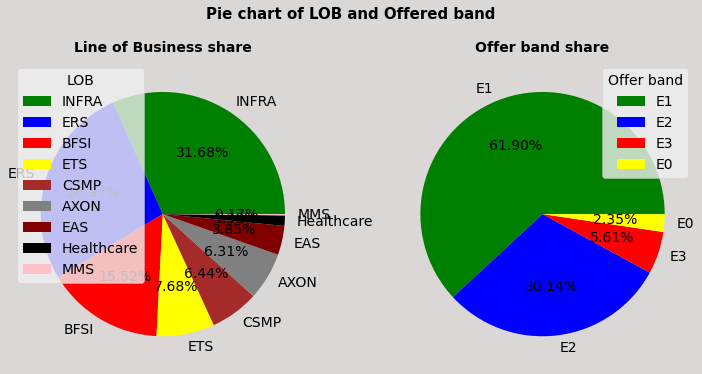

In [238]:
lobhr = hr['LOB'].value_counts()
offerhr = hr['Offered band'].value_counts()

# plot the pie charts
plt.figure(figsize=(10,6), facecolor='#dbd7d7')

plt.subplot(1,2,1)
plt.pie(lobhr.values, 
        colors=color, 
        labels=lobhr.index,
       autopct='%1.2f%%')
plt.legend(title='LOB')
plt.title("Line of Business share")

plt.subplot(1,2,2)
plt.pie(offerhr.values,
       colors=color,
       labels=offerhr.index,
       autopct='%1.2f%%')
plt.legend(title='Offer band')
plt.title("Offer band share")

plt.suptitle("Pie chart of LOB and Offered band", weight='bold', size=15)
plt.show()

**Observations**

These data show that 61.9% of candidates received the E1 offer band, and that 31.68 percent of candidates are from the Infra LOB.

#Pre-processing and baseline¶

pre-process and logistics regression as baseline with cross validation

pipeline for all the models with gridsearchCV and RandomizedsearchCV

In [239]:
# pre-processing the dataframe to build logistic regression model

n_hr = hr.drop('Candidate Ref', axis=1) #(axis = 1 here means you're dropping a column, axis = 0 will mean you're drpping a row)

# divide X and y(target) here the dataset will be split into all the input independent variables(x), & target output variable (y)
X = n_hr.drop('Status', axis=1) #(axis = 1 here means you're dropping a column, axis = 0 will mean you're drpping a row), so here we drop the target column, it cannot br part of "x" as explained
y = n_hr.Status.map({'Joined':1,
                   'Not Joined':0}) # here we map the status values to 1 for 'joined' & 0 or 'not joined' and we put everything in the target out variable'y'

# divide the data and Over-Sample, One hot encoder and scale the data

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42) # here we divide the input (x), & target (y) variables into a train & test set

# Encoding the categorical data
cat_features = [col for col in X_trn.columns if X_trn[col].dtypes == 'object'] # store all input variable's columns in the train-set that have a categorical datatype into the variable called 'cat_features'

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first') # sets the parameters of a onehotencoder and stores the onehotencoder into a variable
OH_train = pd.DataFrame(OH_encoder.fit_transform(X_trn[cat_features])) # gets all input variable columns with categorical features in train set to be fitted into and transformed by the pnehotencoder and then the results added to a pandas dataframe called OH_train
OH_test = pd.DataFrame(OH_encoder.fit_transform(X_tst[cat_features])) # gets all input variable columns with categorical features in test set to be fitted into and transformed by the pnehotencoder and then the results added to a pandas dataframe called OH_test

# put the index back
OH_train.index = X_trn.index # adds back the 'candidate ref' to the onehotencoded input independent variable train-set because it is numerical like all data in the onehotencoded train-set
OH_test.index = X_tst.index # adds back the 'candidate ref' to the onehotencoded input independent variable test-set because it is numerical like all data in the onehotencoded test-set

# drop object cols from X_trn and X_tst
num_trn = X_trn.drop(cat_features, axis=1) # drops all categorical variable columns in the inout variable train set so it can be only numbers & store them  in a new variable
num_tst = X_tst.drop(cat_features, axis=1) # drops all categorical variable columns in the inout variable test set so it can be only numbers & store them  in a new variable

# concat onhot and num data frame
OH_X_trn = pd.concat([num_trn, OH_train], axis=1) # adding the newly onehotencoded categorical features train-set to numerical features train set. we are still talking the input variable (x) set here
OH_X_tst = pd.concat([num_tst, OH_test], axis=1) # adding the newly onehotencoded categorical features test-set to numerical features test set we are still talking the input variable (x) set here

In [240]:
print("before resampling")
y_trn.value_counts() # counts the number of each value in the target variable in the train-set

before resampling


1    5854
0    1342
Name: Status, dtype: int64

In [241]:
# resample the datasets with over and under sampling
sm = SMOTEENN(enn = EditedNearestNeighbours(sampling_strategy='all', kind_sel="mode"),
             random_state=42) # sets the resampler parameters
X_retrn, y_retrn = sm.fit_resample(X = OH_X_trn, y= y_trn) # resamples  the input variable train set that contains the numerical & onehotencoded categorical input independent variables, & the train-set that contains the dependent target variables

print("After resampling")
y_retrn.value_counts()

After resampling


0    5573
1    4047
Name: Status, dtype: int64

In [242]:
X_retst, y_retst = sm.fit_resample(X = OH_X_tst, y= y_tst) # resamples  the input variable test set that contains the numerical & onehotencoded categorical input independent variables, & the test-set that contains the dependent target variables
y_retst.value_counts()

0    1366
1    1004
Name: Status, dtype: int64

Clearly, this dataset is considerably more balanced.

In [243]:
# scale the dataset with minmax scaler
scaler = MinMaxScaler() #scaler defined
scaler.fit(X_retrn) # re-sampled train-set consisting of onhotencoded and numerical input variables fitted to scaler
X_retrn = pd.DataFrame(scaler.fit_transform(X_retrn)) # now transformed by scaler & added to a dataframe
X_retst = pd.DataFrame(scaler.transform(X_retst)) # same operation applied to test set

#Logistics regression model (BaseLine)

In [244]:
# logistics regression model
LR = LogisticRegression(random_state = 42, solver='liblinear', max_iter = 1500) # LR parameters set

# cross validation scoring
cv_score = cross_val_score(estimator=LR, X = X_retrn ,y= y_retrn, scoring='roc_auc',
                          cv=5, n_jobs=-1) # setting the parameters of a cv_scoring system

# print the mean CV score and std dev
print(np.mean(cv_score), np.std(cv_score))

0.791335065331862 0.01499836914718174


In [245]:
# fittting the model
LR.fit(X= X_retrn, y = y_retrn) 

prediction = LR.predict(X = X_retst) # predictions on test data

print("Classification report of the logistics regression model: \n",
      classification_report(y_retst, prediction)) # print the classification report
print("======================================================")
print("Roc Auc score of the LR model: \n", roc_auc_score(y_retst, prediction)) # roc_auc
print("======================================================")
print("Accuracy score of the LR model: \n", accuracy_score(y_retst, prediction)) #accuracy

Classification report of the logistics regression model: 
               precision    recall  f1-score   support

           0       0.72      0.84      0.78      1366
           1       0.72      0.56      0.63      1004

    accuracy                           0.72      2370
   macro avg       0.72      0.70      0.70      2370
weighted avg       0.72      0.72      0.71      2370

Roc Auc score of the LR model: 
 0.6984594564640414
Accuracy score of the LR model: 
 0.720253164556962


**Observations:**

With cross-validation we found our score was much better compared to regular fitted method

We got almost 70% ROC-AUC with 72% of accuracy score with our baseline logistic regression model

In [246]:
# confusion metrics and ROC CURVE plots
def plot_metrics(model, X:np.array, y_target:np.array) -> plt.figure:
    """
    Plot the confusion metrics and ROC-AUC curve for test dataset
    
    Arguments:
    predicted(model)
    X(array) : input test data
    y_target(array) : target_vector
    """
    prediction = model.predict(X)
    
    # compute the confusion matrix
    cm = confusion_matrix(y_target, prediction, labels=model.classes_)
    display = ConfusionMatrixDisplay(confusion_matrix=cm,
                                    display_labels = model.classes_)
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    fig.tight_layout(pad=3, h_pad=2, w_pad=4)
    fig.suptitle(type(model).__name__, weight=12)
    ax[0] = display.plot(ax= ax[0])
    
    # ROC CURVE
    y_pred_prob = model.predict_proba(X)[::,1]
    fpr, tpr, thresholds = roc_curve(y_target, y_pred_prob,
                                    drop_intermediate=False)
    auc = roc_auc_score(y_target, y_pred_prob)
    
    ax[1].plot(fpr, tpr, color=color[6],
              label= f'AUC = {auc:2.2f}')
    ax[1].plot([0,1], [0,1.01], 'r--', lw=1)
    ax[1].legend(loc='lower right', fontsize=10)
    ax[1].set_ylabel('True Positive Rate', fontsize=10)
    ax[1].set_xlabel('Flase Positve Rate', fontsize=10)
    ax[1].set_title("Receiver Operating Characteristic (ROC) curve", fontsize=10)

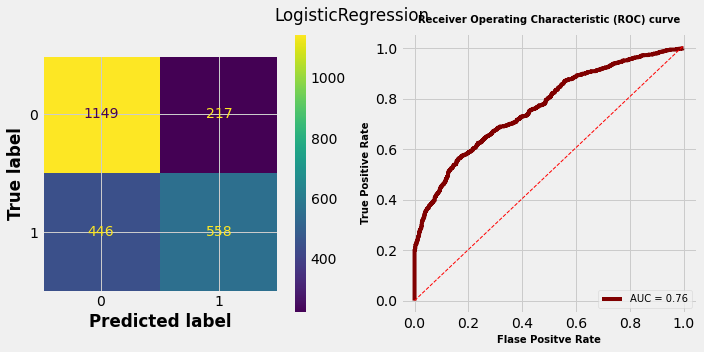

In [247]:
plot_metrics(model=LR, X=X_retst, y_target=y_retst)

# **RandomForestClassifier with feature importancce**

In [248]:
RF = RandomForestClassifier(max_depth=10,
                           n_estimators=150,
                           max_features= 'auto') # random forest object

RF.fit(X_retrn, y_retrn) # fit the model to data


prediction1 = RF.predict(X_retst) # predict on test data

print("Classification report of the Random forest model: \n",
      classification_report(y_retst, prediction1)) # print the classification report
print("======================================================")
print("Roc Auc score of the RF model: \n", roc_auc_score(y_retst, prediction1)) # roc_auc
print("======================================================")
print("Accuracy score of the RF model: \n", accuracy_score(y_retst, prediction1)) #accuracy

Classification report of the Random forest model: 
               precision    recall  f1-score   support

           0       0.91      0.86      0.88      1366
           1       0.82      0.88      0.85      1004

    accuracy                           0.87      2370
   macro avg       0.86      0.87      0.87      2370
weighted avg       0.87      0.87      0.87      2370

Roc Auc score of the RF model: 
 0.8690968191655049
Accuracy score of the RF model: 
 0.8675105485232067


In [249]:
# Now let's do cross validation
# cross validation scoring
cv_score1 = cross_val_score(estimator=RF, X = X_retrn ,y= y_retrn, scoring='roc_auc',
                          cv=5, n_jobs=-1)

# print the mean CV score and std dev
print(np.mean(cv_score1), np.std(cv_score1))

0.9545009621523375 0.07124391794999331


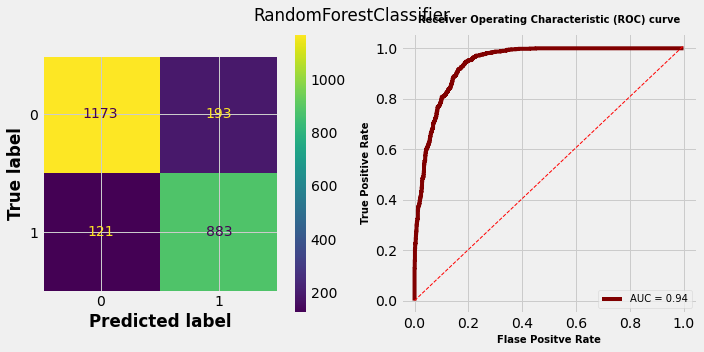

In [250]:
plot_metrics(model=RF, X=X_retst, y_target=y_retst)

***Observations:***

***As we can see, random forests have a cross-validated accuracy of 86% and an AUC of 95%.***

In [251]:
# SHAP importance and sklearn feature importance
shap.__version__

'0.41.0'

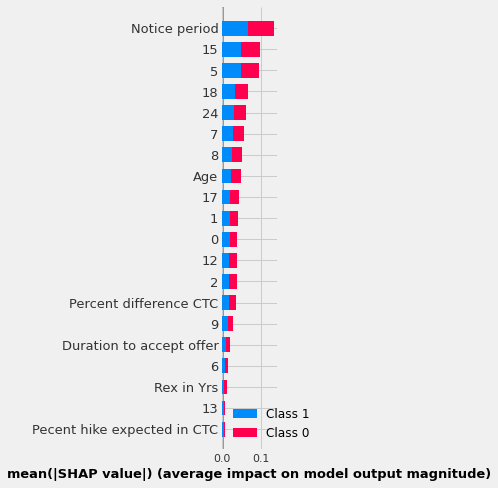

In [252]:
# shap explainer of random forest model
explain = shap.TreeExplainer(RF)

shap_values = explain.shap_values(X_retst)
shap.summary_plot(shap_values, features = OH_X_trn,
                 plot_type='bar',
                 plot_size=(5,7))

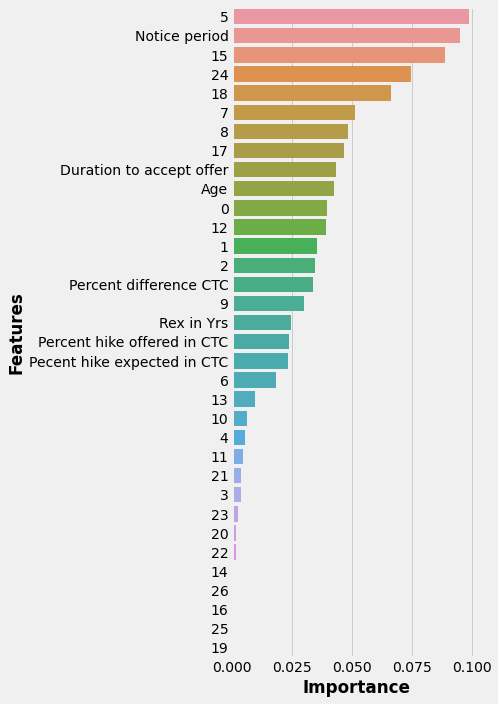

In [253]:
# using feature imporatance methods
feature_rank = pd.DataFrame({"Features": OH_X_trn.columns,
                           "Importance": RF.feature_importances_}
                          )
feature_rank2 = feature_rank.sort_values('Importance', ascending=False)

# plot the feature imp by sklearn 
plt.figure(figsize=(7,10))
sns.barplot(x='Importance',y='Features', orient='h', data=feature_rank2)
plt.show()

***Observations***

***Both techniques can teach us that "Notice period" and the categorical features of 5 and 15 are most crucial, but their relative importance is not the same.***


***Here, we may discover that these features are the best indicators of a candidate's likelihood of joining the organisation.***

**"Joining bonus" and "LOB" are the features of categories 5 and 15, respectively. Therefore, we can infer that both features aid in the target variable's prediction.**

**Pipeline of 8 models to find optimal classification accuracy**

***RandomizedSearchCV***

In [254]:
# instances of each model
RF_clf = RandomForestClassifier(random_state=42)
AD_clf = AdaBoostClassifier(random_state=42)
LR_clf = LogisticRegression(random_state = 42, solver='liblinear', max_iter = 1500)
GB_clf = GradientBoostingClassifier(random_state=42)
ET_clf = ExtraTreesClassifier(random_state = 42)
DT_clf = DecisionTreeClassifier(random_state=42)
KN_clf = KNeighborsClassifier( )
SVC_clf = SVC(degree=10, probability = True, random_state = 42)
NB_clf = BernoulliNB()

In [255]:
# pipeline of all the models with gridsearchCV & RandomSearchCV

#Random Forest 1
param_RF = {}
param_RF['classifier__n_estimators'] = [50,100,150,200,250]
param_RF['classifier__max_features'] = ['auto', 'sqrt', 'log2']
param_RF['classifier__max_depth'] = [5,8,10,14,20]
param_RF['classifier__class_weight'] = [None,{0:1,1:5},
                                       {0:1,1:10},{0:1,1:15}]
param_RF['classifier'] = [RF_clf]


# Adaboost 2
param_AD = {}
param_AD['classifier__n_estimators'] = [3,4,6,8,10,15,25,40]
param_AD['classifier__learning_rate'] = [(0.96 + x/100) for x in range(0,8)]
param_AD['classifier__algorithm'] = ['SAMME','SAMME.R']
param_AD['classifier'] = [AD_clf]

# Logistic regression 3
param_LR = {}
param_LR['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param_LR['classifier__penalty'] = ['l1', 'l2']
param_LR['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param_LR['classifier'] = [LR_clf]

# Decision Tree 4
param_DT = {}
param_DT['classifier__max_depth'] = [5,10,25,None]
param_DT['classifier__min_samples_leaf'] = [2,5,10]
param_DT['classifier__criterion'] = ["gini", "entropy"]
param_DT['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param_DT['classifier'] = [DT_clf]

# Extra trees 5
param_ET = {}
param_ET['classifier__max_depth'] = [5,10,25,None]
param_ET['classifier__max_features'] = [2,5,10]
param_ET['classifier__min_samples_split'] = [2,3,10]
param_ET['classifier__min_samples_leaf'] = [1,3,10]
param_ET['classifier__bootstrap'] = [False]
param_ET['classifier__n_estimators'] = [100,300]
param_ET['classifier__criterion'] = ['gini']
param_ET['classifier'] = [ET_clf]

# K-nearest neighbors 6
param_KN = {}
param_KN['classifier__n_neighbors'] = [5,7,9,11,13,15]
param_KN['classifier'] = [KN_clf]

# Support vector classifier 7
#param_SVC = {}
#param_SVC['classifier__C'] =  [0.1, 1, 10, 100] 
#param_SVC['classifier__gamma'] = [1.0, 0.1, 0.01, 0.001]
#param_SVC['classifier__kernel'] = ['rbf', 'poly', 'sigmoid']
#param_SVC['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
#param_SVC['classifier'] = [SVC_clf]

#Naive Bayes 8 
param_NB = {}
param_NB['classifier__alpha'] = np.logspace(0,-9, num=100)
param_NB['classifier'] = [NB_clf]

# Gradient Boosting 9
param_GB = {}
param_GB['classifier__n_estimators'] = [10, 50, 100, 250]
param_GB['classifier__max_depth'] = [5, 10, 20]
param_GB['classifier'] = [GB_clf]

In [256]:
#pipeline instance
pipeline = Pipeline([('classifier', RF_clf)])

# hyperparamets list
myparams = [param_RF, param_AD, param_LR, param_DT, param_KN, param_ET, param_NB, param_GB]

In [257]:
%%time
# modelling using randomized search CV
mymodel = RandomizedSearchCV(pipeline, myparams, cv=5, n_jobs=2,
                            scoring='roc_auc').fit(X_retrn, y_retrn)

CPU times: user 1.78 s, sys: 65.8 ms, total: 1.84 s
Wall time: 50 s


In [258]:
# best estimator
mymodel.best_estimator_

Pipeline(steps=[('classifier',
                 ExtraTreesClassifier(max_depth=25, max_features=10,
                                      random_state=42))])

In [259]:
mymodel.best_params_

{'classifier__n_estimators': 100,
 'classifier__min_samples_split': 2,
 'classifier__min_samples_leaf': 1,
 'classifier__max_features': 10,
 'classifier__max_depth': 25,
 'classifier__criterion': 'gini',
 'classifier__bootstrap': False,
 'classifier': ExtraTreesClassifier(max_depth=25, max_features=10, random_state=42)}

In [260]:
mymodel.best_score_

0.9696930811585862

In [261]:
pred = mymodel.best_estimator_.predict(X_retst)
pred_proba = mymodel.best_estimator_.predict_proba(X_retst)
scoring = mymodel.score(X_retst, y_retst)
classif_report = classification_report(y_retst, pred)
accuracy_final = accuracy_score(y_retst, pred)
auc_score = roc_auc_score(y_retst, pred)
print("Classification report of best RF model is: \n", classif_report)
print("******************************************************")
print("Accuracy of the best RF model is: \n", round(accuracy_final,3)*100)
print("******************************************************")
print("Auc score of the best RF model is: \n", round(auc_score, 3)*100)
print("******************************************************")
print("Scoring of test data on the best estimator: \n",scoring)

Classification report of best RF model is: 
               precision    recall  f1-score   support

           0       0.92      0.82      0.87      1366
           1       0.79      0.91      0.84      1004

    accuracy                           0.86      2370
   macro avg       0.86      0.86      0.86      2370
weighted avg       0.87      0.86      0.86      2370

******************************************************
Accuracy of the best RF model is: 
 85.8
******************************************************
Auc score of the best RF model is: 
 86.5
******************************************************
Scoring of test data on the best estimator: 
 0.9322752912216434


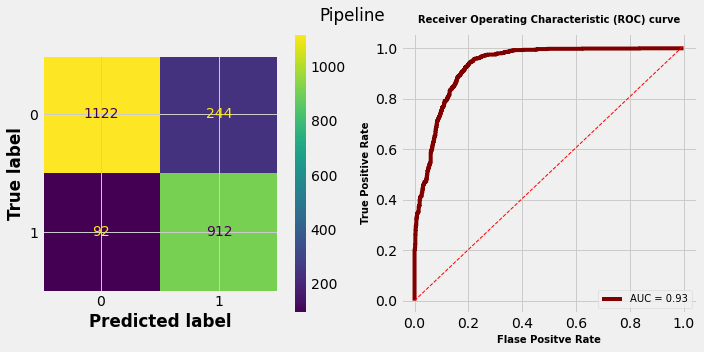

In [262]:
plot_metrics(model= mymodel.best_estimator_ , X = X_retst, y_target=y_retst)

**Observations**

**We discovered the best random forest estimator for the randomised search CV model, with up to 86.2% accuracy and a 93% ROC AUC score on test data.**


**Accuracy and auc score fluctuate with each notebook run because it is a randomised search of parameters with the optimal settings.**

**GridSearchCV**

In [263]:
# Define hyperparameters for all models

# Random Forest 
RF_params = {}
RF_params['n_estimators'] = [5,10,50,100]
RF_params['max_features'] = ['sqrt', 'log2']
RF_params['max_depth'] =  [4,5,6]
RF_params['criterion'] = ['gini', 'entropy']

# Adaboost 
AD_params = {}
AD_params['n_estimators'] =  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20]
AD_params['learning_rate'] =  [(0.97 + x / 100) for x in range(0, 8)]
AD_params['algorithm'] =  ['SAMME', 'SAMME.R']

# Logistic Regression
LR_params = {}
LR_params['C'] = np.logspace(-4,4,20) 
LR_params['penalty'] = ['l1', 'l2']

# Decission Tree
DT_params = {}
DT_params['max_depth'] =  [1, 2, 3, 10, 20]
DT_params['min_samples_leaf'] = [2, 5, 10, 50, 100]
DT_params['criterion'] = ["gini", "entropy"]
# 50 combinations

# Extra Trees
ET_params = {}
ET_params['max_depth'] = [5,10,25,None]
ET_params['max_features'] = [2,5,10]
ET_params['min_samples_split'] = [2,3,10]
ET_params['min_samples_leaf'] = [1,3,10]
ET_params['bootstrap'] = [False]
ET_params['n_estimators'] = [100,300]
ET_params['criterion'] = ['gini']

# KNeighbors 
KN_params = {}
KN_params['n_neighbors'] = [5,7,9,11,13,15]
KN_params['weights'] = ['uniform','distance']
KN_params['metric' ] = ['minkowski','euclidean','manhattan']

# Support Vector Classifier
#SVC_params = {}
#SVC_params['C'] = [0.1,1, 10, 100]
#SVC_params['gamma'] = [1,0.1,0.01,0.001]
#SVC_params['kernel'] = ['rbf', 'poly', 'sigmoid']

# Naive Bayes
NB_params = {}
NB_params['alpha'] = [0.01, 0.1, 0.5, 1.0, 10.0]

# Gradient Boosting
GB_params = {}
GB_params['n_estimators'] = [10, 50, 100, 250]
GB_params['max_depth'] = [5, 10, 20]

In [264]:
# model list and parameters list
model_list = [RF_clf, AD_clf, ET_clf, LR_clf, DT_clf, KN_clf, NB_clf, GB_clf]
param_list = [RF_params, AD_params, ET_params, LR_params, DT_params, KN_params, NB_params, GB_params]

# zip the model and param list dict of dicts 
init_models = dict(zip(model_list,param_list))

In [265]:
# Define hyperparameters for all models

# Random Forest 
RF_params = {}
RF_params['n_estimators'] = [5,10,50,100]
RF_params['max_features'] = ['sqrt', 'log2']
RF_params['max_depth'] =  [4,5,6]
RF_params['criterion'] = ['gini', 'entropy']

# Adaboost 
AD_params = {}
AD_params['n_estimators'] =  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20]
AD_params['learning_rate'] =  [(0.97 + x / 100) for x in range(0, 8)]
AD_params['algorithm'] =  ['SAMME', 'SAMME.R']

# Logistic Regression
LR_params = {}
LR_params['C'] = np.logspace(-4,4,20) 
LR_params['penalty'] = ['l1', 'l2']

# Decission Tree
DT_params = {}
DT_params['max_depth'] =  [1, 2, 3, 10, 20]
DT_params['min_samples_leaf'] = [2, 5, 10, 50, 100]
DT_params['criterion'] = ["gini", "entropy"]
# 50 combinations

# Extra Trees
ET_params = {}
ET_params['max_depth'] = [5,10,25,None]
ET_params['max_features'] = [2,5,10]
ET_params['min_samples_split'] = [2,3,10]
ET_params['min_samples_leaf'] = [1,3,10]
ET_params['bootstrap'] = [False]
ET_params['n_estimators'] = [100,300]
ET_params['criterion'] = ['gini']

# KNeighbors 
KN_params = {}
KN_params['n_neighbors'] = [5,7,9,11,13,15]
KN_params['weights'] = ['uniform','distance']
KN_params['metric' ] = ['minkowski','euclidean','manhattan']

# Support Vector Classifier
#SVC_params = {}
#SVC_params['C'] = [0.1,1, 10, 100]
#SVC_params['gamma'] = [1,0.1,0.01,0.001]
#SVC_params['kernel'] = ['rbf', 'poly', 'sigmoid']

# Naive Bayes
NB_params = {}
NB_params['alpha'] = [0.01, 0.1, 0.5, 1.0, 10.0]

# Gradient Boosting
GB_params = {}
GB_params['n_estimators'] = [10, 50, 100, 250]
GB_params['max_depth'] = [5, 10, 20]

In [266]:
# model list and parameters list
model_list = [RF_clf, AD_clf, ET_clf, LR_clf, DT_clf, KN_clf, NB_clf, GB_clf]
param_list = [RF_params, AD_params, ET_params, LR_params, DT_params, KN_params, NB_params, GB_params]

# zip the model and param list dict of dicts 
init_models = dict(zip(model_list,param_list))

In [268]:
%%time
# Grid search CV models

for model, params in tqdm(init_models.items()):
    
    mymodel = GridSearchCV(estimator=model,
                          param_grid=params,
                          scoring='roc_auc',
                          cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                          n_jobs=-1)
    mymodel.fit(X_retrn, y_retrn)
    best_model = mymodel.best_estimator_
    best_params = mymodel.best_params_
    best_score = mymodel.best_score_
    preds = mymodel.predict(X_retst)
    accuracyGSCV = accuracy_score(y_retst, preds)
    roc_auc = roc_auc_score(y_retst, preds)
    classif_report = classification_report(y_retst, preds)
    
print(f"Classification report of best {best_model} is: \n", classif_report)
print("******************************************************")
print(f"Accuracy of the best {best_model} is: \n", round(accuracyGSCV,3)*100)
print("******************************************************")
print(f"Auc score of the best {best_model} is: \n", round(roc_auc, 3)*100)
print("******************************************************")
print("Scoring of the best estimator: \n", best_score)
print("******************************************************")
print(f"Best model is {best_model} and best parameters are \n{best_params}")

100%|██████████| 8/8 [26:44<00:00, 200.55s/it]

Classification report of best GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42) is: 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87      1366
           1       0.80      0.89      0.84      1004

    accuracy                           0.86      2370
   macro avg       0.85      0.86      0.86      2370
weighted avg       0.86      0.86      0.86      2370

******************************************************
Accuracy of the best GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42) is: 
 85.7
******************************************************
Auc score of the best GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=42) is: 
 86.2
******************************************************
Scoring of the best estimator: 
 0.970167316608161
******************************************************
Best model is GradientBoostingClassifier(max_depth=10, n_estimators=250, 

**Observations**

**The training dataset gave us the best scores since it overfits the data, but the gradient boosting classifier's testing accuracy is poor.**


**The best model, gradient boosting, has a model accuracy on testing data of approximately 85.7% and a ROC-AUC score of approximately 86.2%.**

**Conclusions**

**In the end, we had to respond to HR's question on what influences applicants joining the company, in accordance with the project's purpose.
Here are our responses.**


The notice period has the biggest influence on a candidate's decision to join the organisation.

The likelihood of the candidate withdrawing from the application increases if the offered raise is lower than anticipated.

The candidates' odds are impacted by LOB and the hiring incentive. So remember this.